# Multi-Class Prediction of Obesity Risk
### Kaggle Competition

column max_columns daisplay [fix](https://github.com/jupyterlab/jupyterlab/issues/14625#issuecomment-1722137537) for Firefox

Firstly, we work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

#### Packages and Libraries:
 * Plotly



Firstly, we'll work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

# Data Preprocessing and Analysis

In [3]:
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_columns', 85)
pd.option_context("display.max_rows", 10, "display.max_columns", 18)
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>")) # column width display fix for Firefox

# df = pd.read_csv('data/ObesityDataSet.csv') # Original dataset 
df = pd.read_csv('data/train.csv')
# test_df = read_csv('data/test.csv')

pd.options.display.max_columns = None
print(df.shape)
df.head()

(20758, 18)


id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


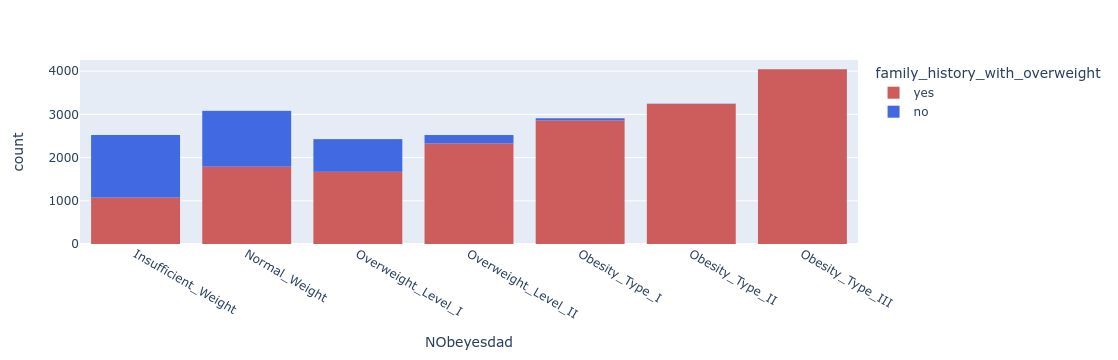

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.express as px
color_map = {'yes': 'indianred', 'no': 'royalblue'}

obesity_list = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

print(df.NObeyesdad.unique())
px.histogram(df, x='NObeyesdad', color='family_history_with_overweight', 
             category_orders={'NObeyesdad': obesity_list}, color_discrete_map=color_map) # .update_xaxes(categoryorder='total ascending')

*NObeyesdad* column will serve as our *target attribute*, also known as ***ground truth***

As we may observe from the histogram, the distribution of weight categories is approximately equal. 
Additionally, we may note the impact of genetics on the occurrence of obesity. 
Among participants categorised as "Insufficient Weight", "Normal Weight" and "Overweight Level I" a significant number have no family history of obesity. This suggests a correlation between genetic predisposition and obesity occurrence. Interestingly, the more severe the overweight category, the fewer people report family history with overweight.

We will create heatmaps in order to perform a more thorough examination of the influence of specific features on obesity.

For that reason we ought to convert non-numerical entries into numbers

### Inspect for outliers or erroneous entries

------------------- columns with strs -------------------

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


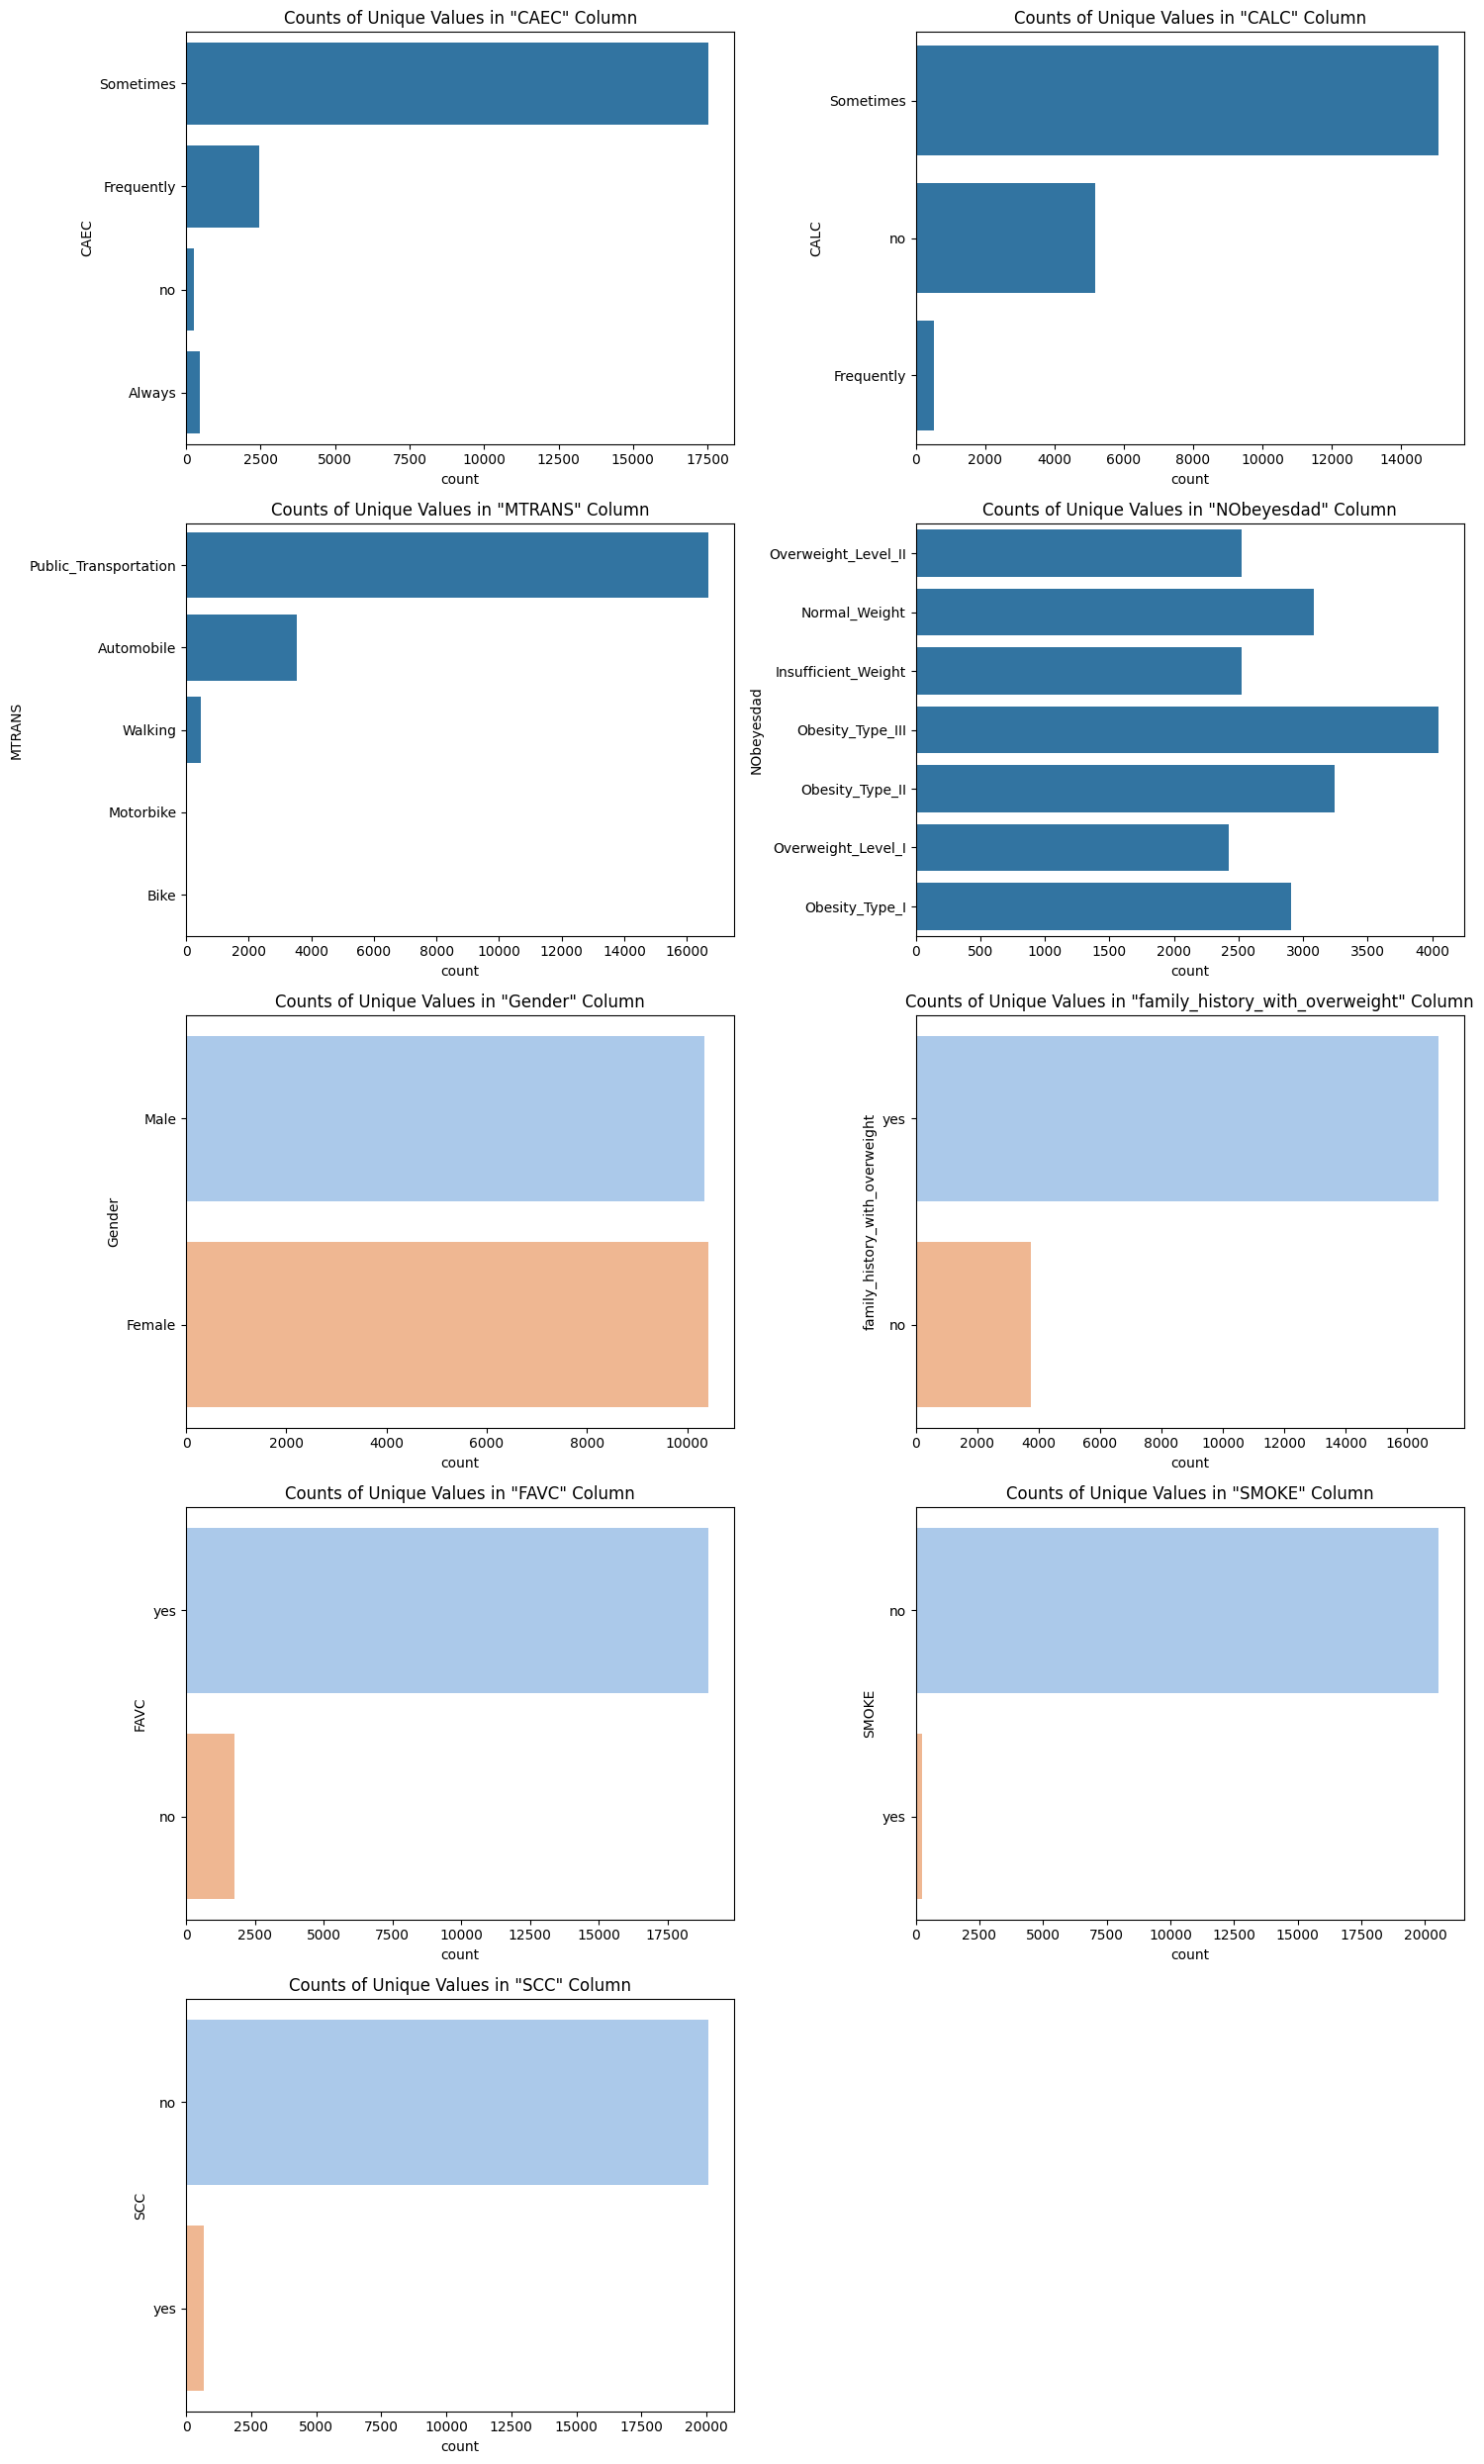

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
string_columns = df.select_dtypes(include='object').columns
str_cols = string_columns

if len(str_cols) == 0:
  print("There are not string columns")
  raise SystemExit   # Exit the program
print("------------------- columns with strs -------------------\n")
print(str_cols)

# Filter string columns based on the number of unique values
more_than_two_unique = [col for col in string_columns if df[col].nunique() > 2]
two_unique = [col for col in string_columns if df[col].nunique() == 2]

# Set up the figure and axis for the subplots
n_cols = 2
n_rows = (len(more_than_two_unique) + len(two_unique) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Iterate through the string columns with more than two unique values and create a bar plot for each
for idx, col in enumerate(more_than_two_unique):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax)  # Use 'y' parameter for horizontal bars
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Iterate through the string columns with exactly two unique values and create a bar plot for each
for idx, col in enumerate(two_unique, start=len(more_than_two_unique)):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax, palette="pastel")  # Use a different color palette
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Remove empty subplots
for idx in range(len(more_than_two_unique) + len(two_unique), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


------------------- columns with floats -------------------

['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
-----------------------------------------------------------

['id', 'Age', 'Height', 'Weight']
['NCP', 'CH2O', 'FAF', 'TUE']


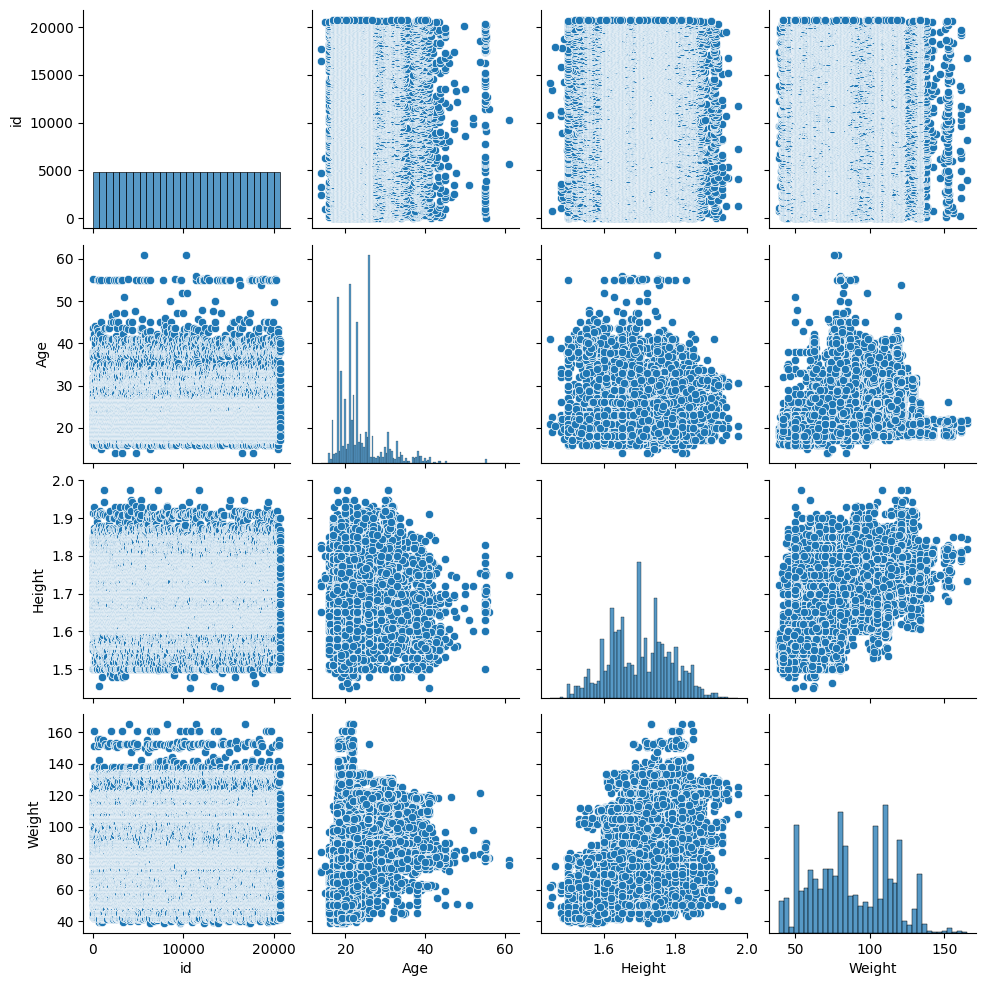

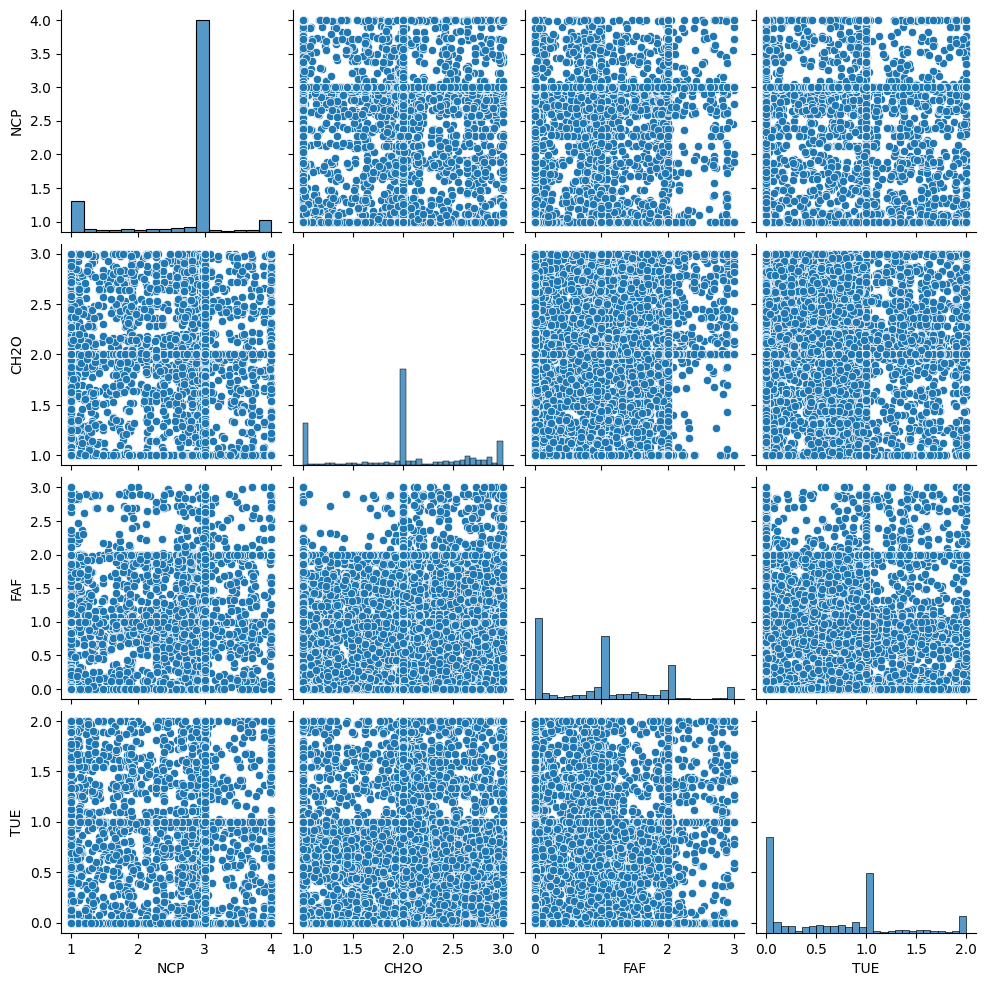

In [7]:
import seaborn as sb
# select integer columns
float_cols = list(df.select_dtypes(include=['int', 'float']).columns)
sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 5)]
print("------------------- columns with floats -------------------\n")
print(float_cols)
print("-----------------------------------------------------------\n")
for sub in sublist:
  print(f"{sub}")
  sb.pairplot(df[sub].dropna())

after analysing the distribution graphs, no clear outliers were found, which is unusual for real-world data. We will assume that the data was intentionally predefined for learning purposes.

##### We may separate the entries by age category to prove or disprove the [assumption that metabolism slows with age](https://health.osu.edu/wellness/aging/does-metabolism-really-slow-down-with-age)

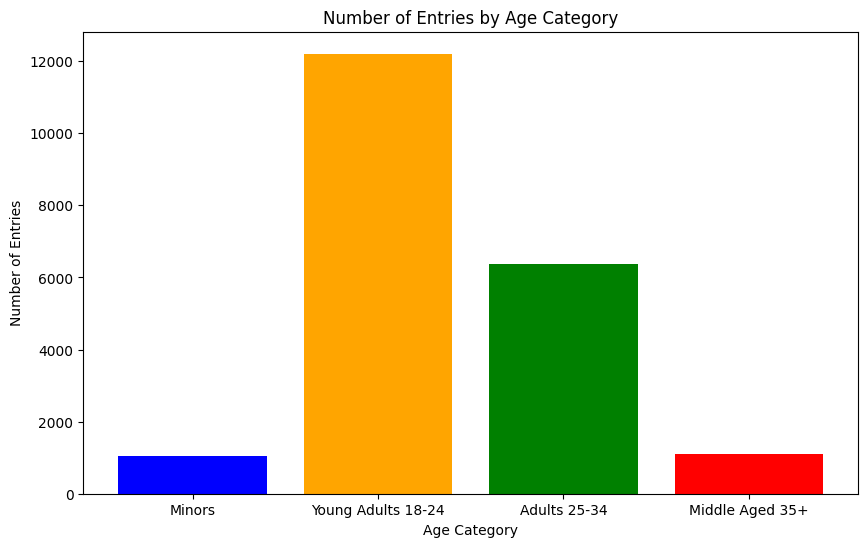

In [8]:
import matplotlib.pyplot as plt

minors_count = df[df.Age < 18].shape[0]
young_adults_1_count = df[(df.Age >= 18) & (df.Age < 25)].shape[0]
adults_count = df[(df.Age >= 25) & (df.Age < 35)].shape[0]
middle_aged_count = df[df.Age >= 35].shape[0]

categories = ['Minors', 'Young Adults 18-24', 'Adults 25-34', 'Middle Aged 35+']
counts = [minors_count, young_adults_1_count, adults_count, middle_aged_count]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Entries by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Entries')
plt.xticks()
plt.show()


In [9]:
oldest_participant = df.loc[df.Age.idxmax()]
oldest_participant

id                                              5646
Gender                                          Male
Age                                             61.0
Height                                          1.75
Weight                                          79.0
family_history_with_overweight                   yes
FAVC                                             yes
FCVC                                             3.0
NCP                                              3.0
CAEC                                       Sometimes
SMOKE                                             no
CH2O                                             2.0
SCC                                               no
FAF                                              2.0
TUE                                              0.0
CALC                                       Sometimes
MTRANS                                    Automobile
NObeyesdad                        Overweight_Level_I
Name: 5646, dtype: object

Although the age distribution of participants is uneven, with a notably smaller number of older participants, we lack sufficient evidence to classify these older entries as outliers. To achieve a more robust model, we should aim to either increase the number of participants for a more balanced distribution across age categories or consider excluding the older and minor categories due to their insufficient representation.

We **do not have enough grounds to suggest that age significantly affect weight gain**, as the middle aged and underaged categories are underrepresented. 

#### Convert to numerical representation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
string_columns = []
for i in list(df.columns):
    if df[i].dtype != 'float64' and df[i].dtype != 'int64':
        # print(f"{i}: {df[i].unique()}")
        string_columns.append(i)
string_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

We could use scikit-learn's LabelEncoder.
~~~~
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in string_columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

~~~~
However, as mentioned [here](https://github.com/AlexanderNixon/Machine-learning-reads/blob/master/How-to-encode-ordinal-features.ipynb) LabelEncoder does not assign numbers based on the semantic meaning of these words, but simply assigns values based on the alphabetical or lexicographical order of the categories it encounters. This can lead to misinterpretations, especially in the case of ordinal data where the order of categories carries meaningful information. The better and more appropriate approach would be to assign numbers to categories based on the meaning, i.e


Insufficient_Weight - 0, Normal_Weight - 1, ... , Obesity_Type_III - 6



In [12]:
df.NObeyesdad.dtype not in ['float', 'int']

True

In [13]:
yes_no_order = {'no': 0, 'yes': 1}
if df.SMOKE.dtype not in ['float', 'int']:
    df['SMOKE'] = df['SMOKE'].map(yes_no_order)
if df.FAVC.dtype not in ['float', 'int']:
    df['FAVC'] = df['FAVC'].map(yes_no_order)
if df.SCC.dtype not in ['float', 'int']:
    df['SCC'] = df['SCC'].map(yes_no_order)
if df.family_history_with_overweight.dtype not in ['float', 'int']:
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map(yes_no_order)

gender_map = {'Female': 0, 'Male': 1}
if df.Gender.dtype not in ['float', 'int']:
    df['Gender'] = df['Gender'].map(gender_map)

obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 

if df.NObeyesdad.dtype not in ['float', 'int']:
    df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)

transport_order = { 
    'Bike': 0, 
    'Walking': 1, 
    'Public_Transportation': 2, 
    'Motorbike': 3, 
    'Automobile': 4 
}
if df.MTRANS.dtype not in ['float', 'int']:
    df['MTRANS'] = df['MTRANS'].map(transport_order)

frequency_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

if df.CAEC.dtype not in ['float', 'int']:
    df['CAEC'] = df['CAEC'].map(frequency_order)
if df.CALC.dtype not in ['float', 'int']:
    df['CALC'] = df['CALC'].map(frequency_order)

In [14]:
df.head()

id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     1      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     1      0   
3                               1     1  3.000000  3.000000     1      0   
4                               1     1  2.679664  1.971472     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.763573    0  0.000000  0.976473     1       2           3  
1  2.000000    0  1.000000  1.000000     0       4           1  
2  1.910378    0  0.866045  1.673584     0       2           0  
3  1.674061    0  1.467863  0.780199     1       2           6  
4  1.979848    0  1.967973  0.931721     1       2           3

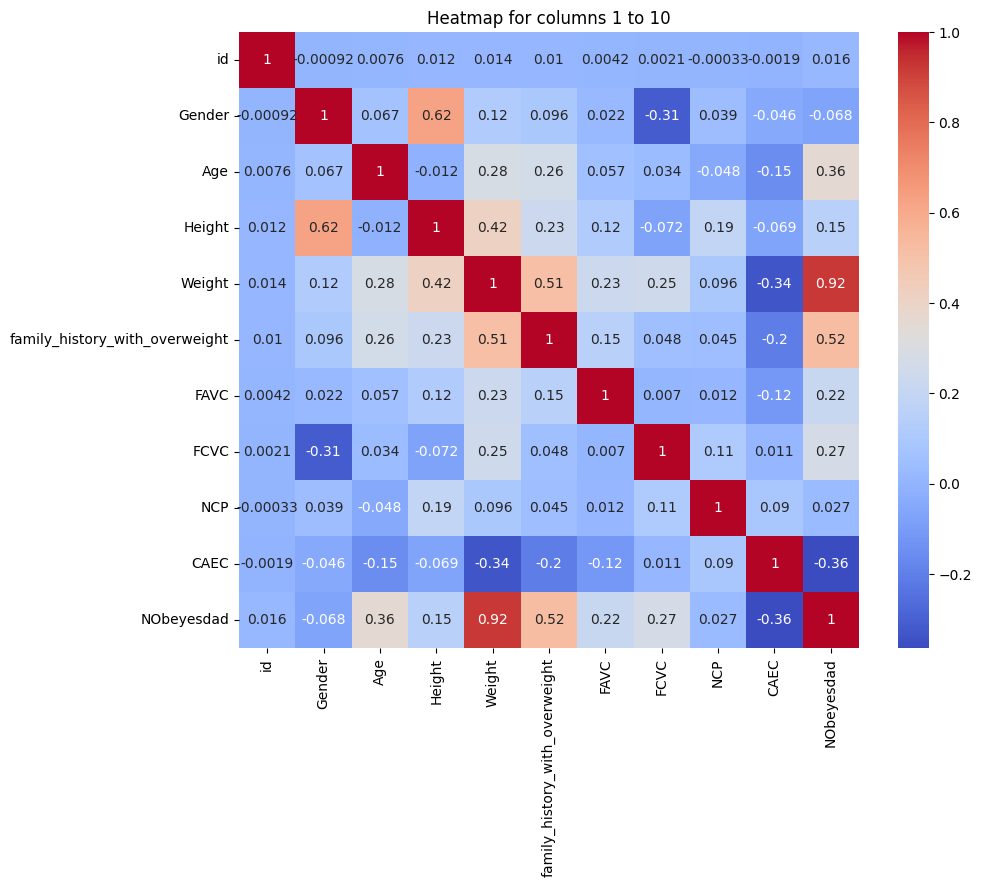

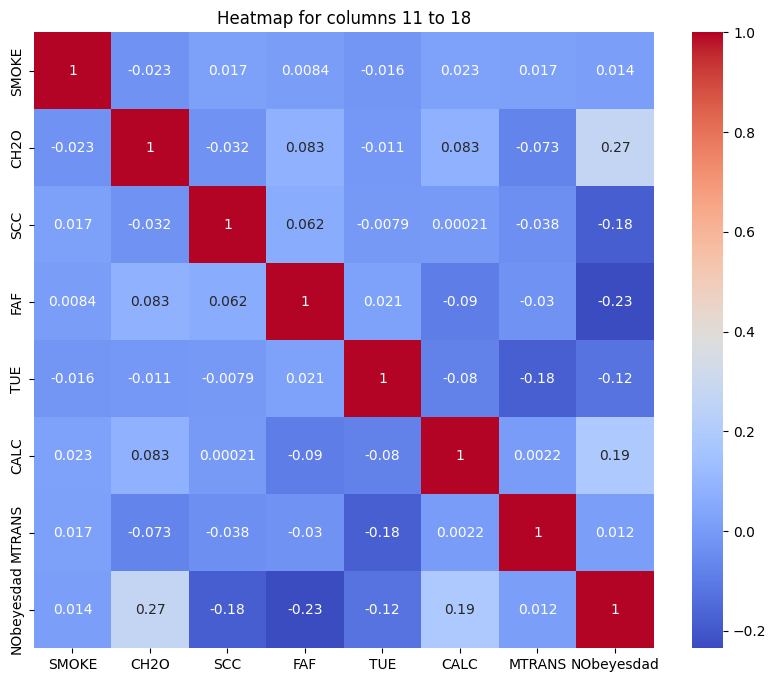

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and it's already loaded and preprocessed
# Ensure that 'NObeyesdad' is mapped to numerical values as needed

# Number of columns in df
num_cols = len(df.columns)

# Make sure 'NObeyesdad' column is in the dataframe
if 'NObeyesdad' not in df.columns:
    print("The 'NObeyesdad' column does not exist in the dataframe.")



# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i + 10 < num_cols:
        cols = df.columns[i:i+10]
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = df.columns[i:]

    # Always include 'NObeyesdad' column
    if 'NObeyesdad' not in cols:
        cols = cols.insert(len(cols), 'NObeyesdad')

    # Compute correlation and create heatmap
    corr = df[cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {min(i+10, num_cols)}")
    plt.show()


In [16]:
correlation_matrix = df.corr()

In [17]:
influence = correlation_matrix[(correlation_matrix.NObeyesdad > 0.1) | (correlation_matrix.NObeyesdad < -0.1)]

In [18]:
dict(influence.NObeyesdad)

{'Age': 0.3562110538376184,
 'Height': 0.15014107608414867,
 'Weight': 0.921250303589431,
 'family_history_with_overweight': 0.5220256186068654,
 'FAVC': 0.21540067158028978,
 'FCVC': 0.27293289452148317,
 'CAEC': -0.3640517375455865,
 'CH2O': 0.27315370852277887,
 'SCC': -0.184959336907074,
 'FAF': -0.23474454130372188,
 'TUE': -0.12100862043252815,
 'CALC': 0.18936104338046592,
 'NObeyesdad': 1.0}

**These features influence obesity the most**

# Modelling

### K-nearest neighbor 

In [53]:
X = df.iloc[:, 1:-1]# Features
X.head()

y = df.iloc[:, -1]
y.head()

0    3
1    1
2    0
3    6
4    3
Name: NObeyesdad, dtype: int64

In [19]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming the last column is the target variable
X = df.iloc[:, 1:-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Verify the shapes of the datasets
print("Training input set shape:", X_train.shape)
print("Testing input set shape:", X_test.shape)

# Step 4: Create KNN model
# You can change n_neighbors to use a different number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Step 5: Fit the model with the training data
knn_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


accuracy = knn_classifier.score(X_test, y_test)
accuracy

Training input set shape: (15568, 16)
Testing input set shape: (5190, 16)
Accuracy: 83.29%


0.8329479768786127

 ### Prevent overfitting 
 The model achieves +=90 of accuracy. However, the model will perform differently depending on the subset of the data it was trained on

scikit_learn's **train_test_split** function separates the data to train and test using a random number generator. 
That's why it's worth examining how the model would perform when the data is separated in different ways.
Additionally, it's worth noting that computers are not able to generate truly random numbers, but rather [pseudorandom](https://stackoverflow.com/questions/4156907/why-is-random-not-so-random)

more about [pseudorandomness](https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/)

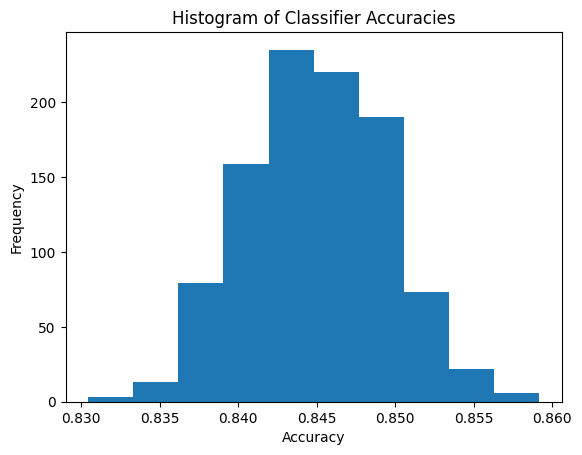

In [55]:
accuracies = []
num_experiments = 100

for _ in range(num_experiments):
    # Create a new train-test split for each experiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
    
    # Create an instance of the DecisionTreeClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    
    # Train the classifier on the training set
    knn_classifier.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing set
    accuracy = knn_classifier.score(X_test, y_test)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classifier Accuracies')
plt.show()


We'll utilize K-fold cross-validation to mitigate the risk of overfitting

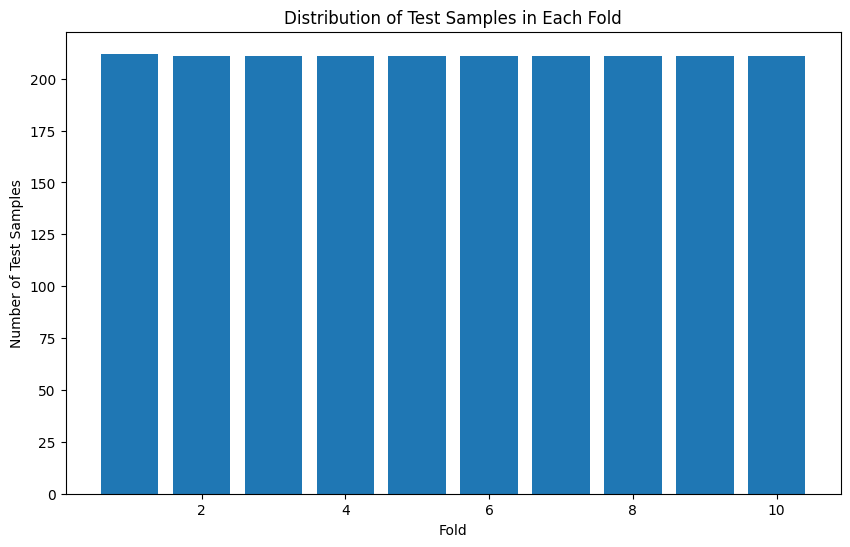

In [19]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Select all columns except the target column
all_inputs = df.drop('NObeyesdad', axis=1).values
all_targets = df['NObeyesdad'].values

def plot_cv(cv, features, labels):
    fold_sizes = []
    
    for i, (train, test) in enumerate(cv.split(features, labels)):
        fold_sizes.append(len(test))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(fold_sizes) + 1), fold_sizes)
    plt.xlabel('Fold')
    plt.ylabel('Number of Test Samples')
    plt.title('Distribution of Test Samples in Each Fold')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_targets)


All folds are of equal height, which confirms that StratifiedKFold has evenly distributed the data across each fold.
If there was significant difference in the heights of the bars, it would indicate an uneven distribution of instances across folds.

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors=3)

cv = StratifiedKFold(n_splits=20)
cv_scores = cross_val_score(knn_classifier, all_inputs, all_targets, cv=cv)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()
print(cv_scores)

NameError: name 'all_inputs' is not defined

### Find the best parameters for the knn classifier

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

input, target = df.iloc[:, :-1].values, df.iloc[:, -1].values

knn_classifier = KNeighborsClassifier()

parameter_grid = {
    'n_neighbors': range(2, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

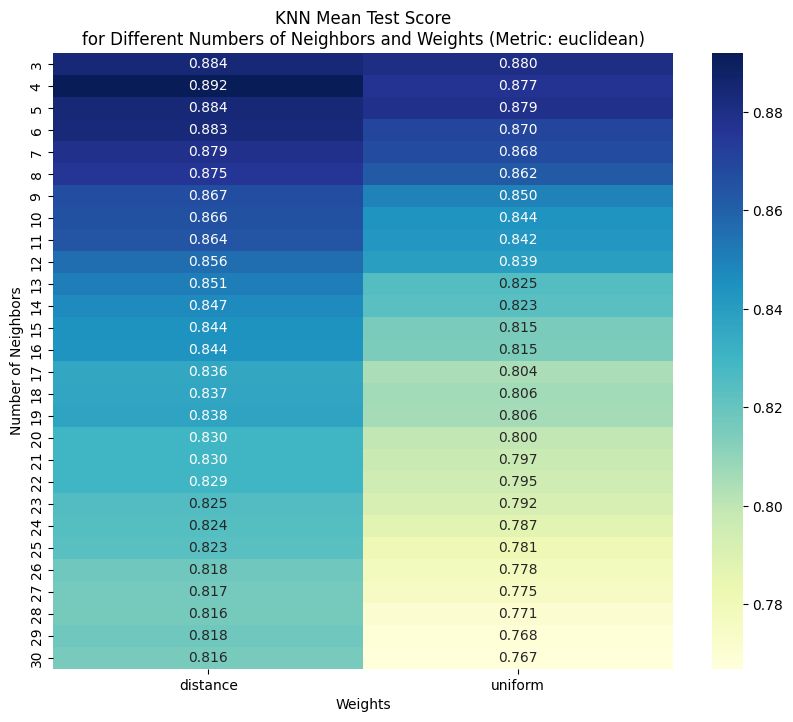

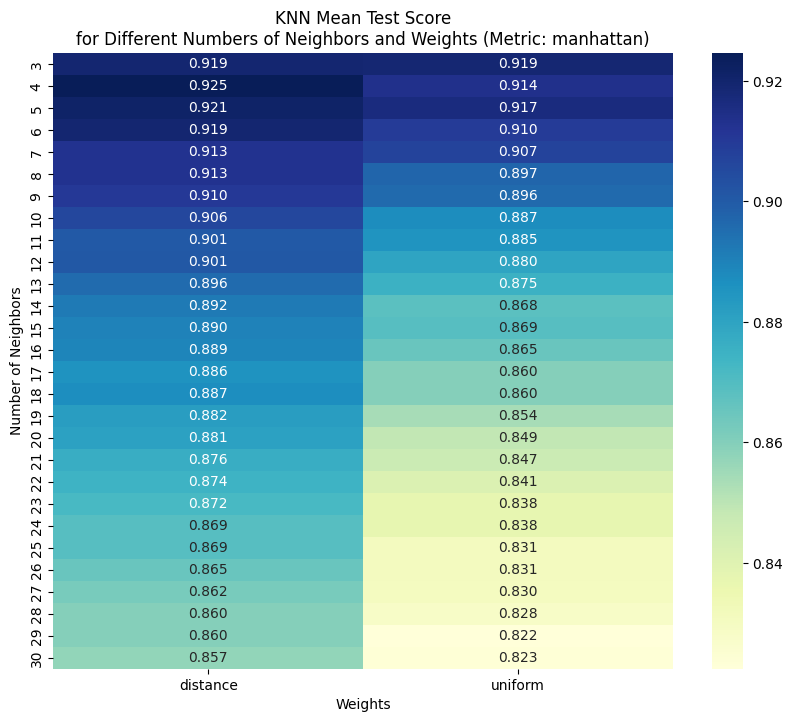

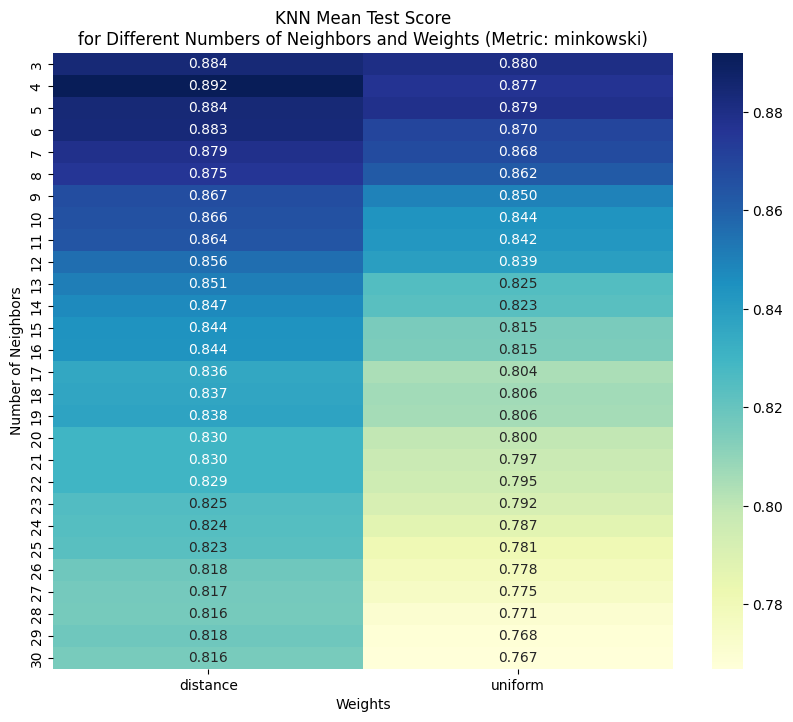

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

# Convert the grid search results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Assuming the 'metric' parameter is fixed to 'euclidean' for the purpose of visualization
# Filter the results for each combination of 'n_neighbors' and 'weights' for the 'euclidean' metric
metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    results_filtered = results_df[results_df['param_metric'] == metric]
    
    # Pivot the data for the heatmap
    # Correcting the pivot_table syntax
    pivot_table = results_filtered.pivot(index="param_n_neighbors", columns="param_weights", values="mean_test_score")
    
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sb.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.title(f'KNN Mean Test Score\nfor Different Numbers of Neighbors and Weights (Metric: {metric})')
    plt.xlabel('Weights')
    plt.ylabel('Number of Neighbors')
    plt.show()


In [26]:
from sklearn.metrics import classification_report

# Reverse the obesity map to get class indices from the class names
reverse_obesity_map = {v: k for k, v in obesity_map.items()}

# Generate a classification report with actual class names
report = classification_report(
    y_test,
    y_pred,
    target_names=[reverse_obesity_map[i] for i in range(len(reverse_obesity_map))]
)
print(report)


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        56
      Normal_Weight       0.93      0.61      0.74        62
 Overweight_Level_I       0.81      0.96      0.88        56
Overweight_Level_II       0.96      0.96      0.96        50
     Obesity_Type_I       0.93      0.99      0.96        78
    Obesity_Type_II       1.00      0.98      0.99        58
   Obesity_Type_III       0.98      1.00      0.99        63

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.92       423
       weighted avg       0.93      0.93      0.92       423



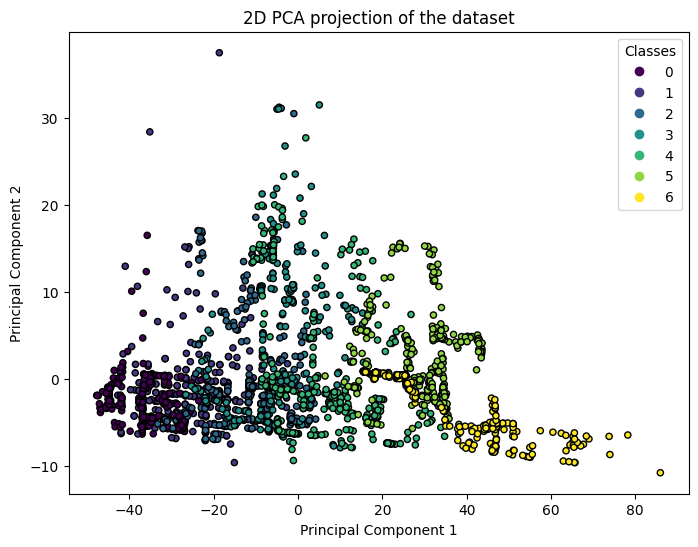

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your 16-dimensional input data and y is the target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("2D PCA projection of the dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


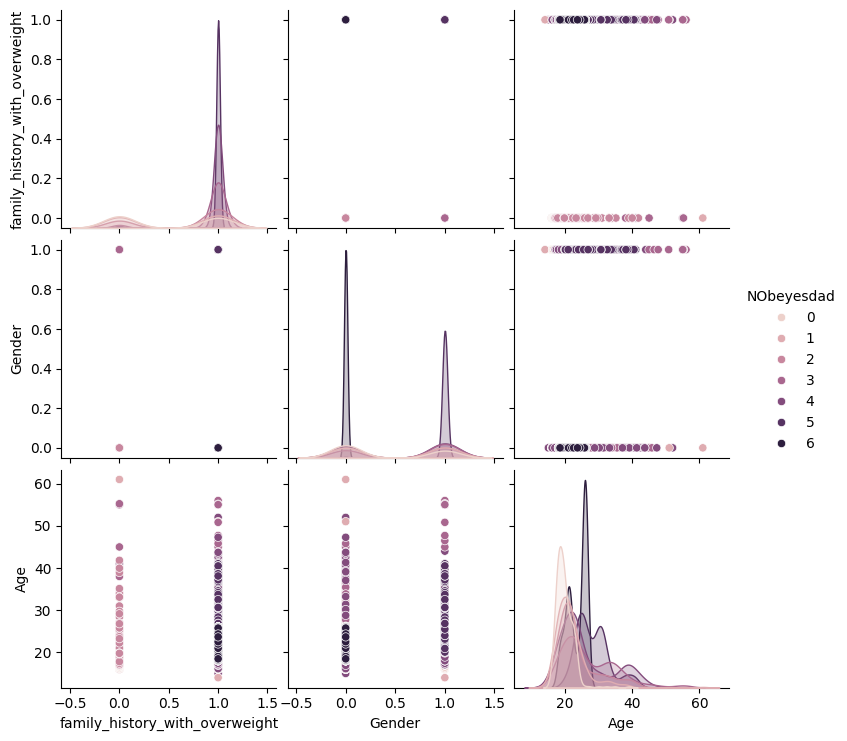

In [28]:
import seaborn as sns

sns.pairplot(df[['family_history_with_overweight', 'Gender', 'Age', 'NObeyesdad']], hue='NObeyesdad')
plt.show()

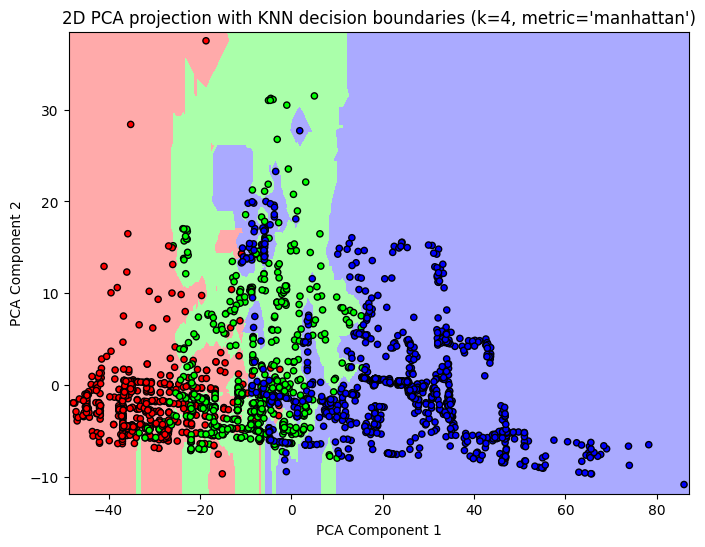

In [29]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train a new KNN model on the 2D PCA-projected data
knn_2d = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan')
knn_2d.fit(X_pca, y)


# Create color maps for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Set up mesh grid for the decision boundary plot
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class using the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2D PCA projection with KNN decision boundaries (k=4, metric='manhattan')")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()


## Generate result
Create KNN classifier with the best metrics

In [ ]:
knn_classifier